Loaded generated images with shape: (1, 4, 64, 64, 64)
Sample shape: (64, 64, 64)
Loaded CLS heatmaps with shape: (64, 8, 8)
Final heatmap volume shape: (64, 64, 64)


<Figure size 1500x1500 with 0 Axes>

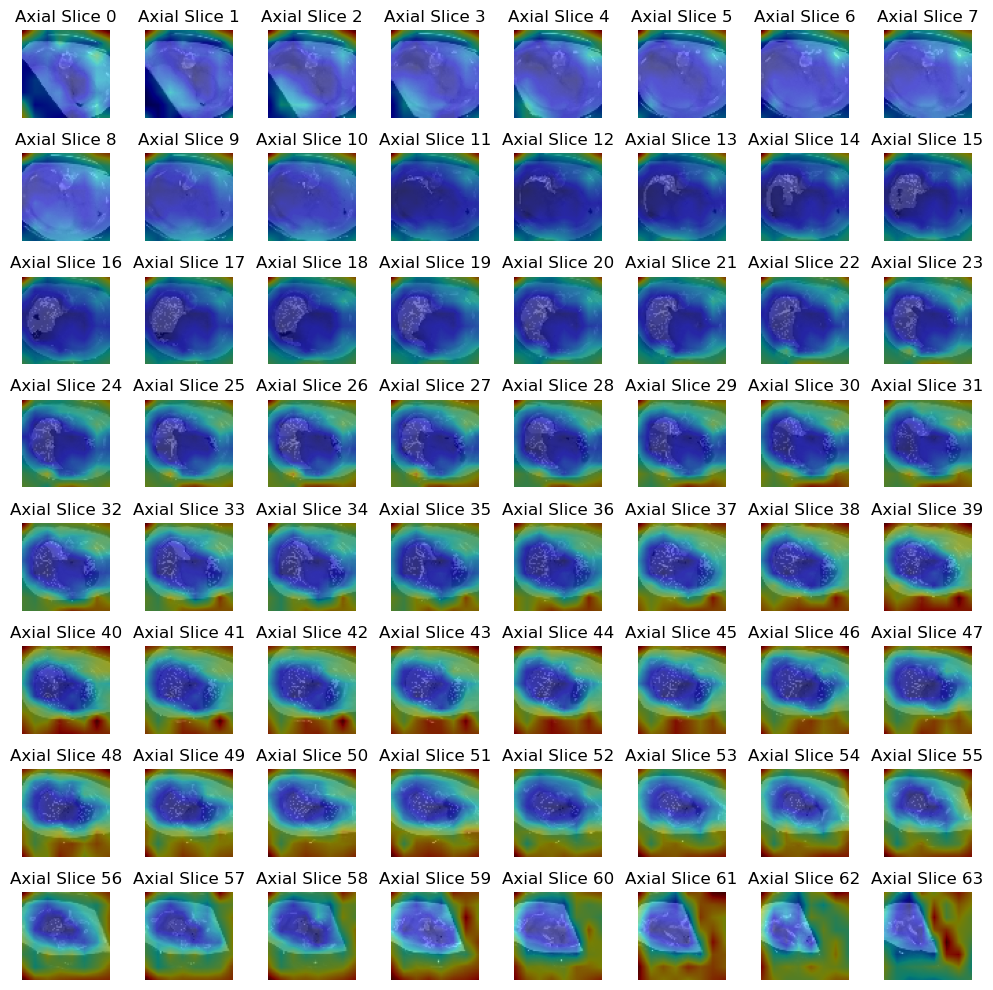

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import zoom

def normalize_image(image):
    image_min = image.min()
    image_max = image.max()
    return (image - image_min) / (image_max - image_min + 1e-8)

def overlay_heatmap_on_slices(volume, heatmap_volume, view='axial', n_rows=8, n_cols=8):
    if view == 'axial':
        slices = volume
        heatmap_slices = heatmap_volume
    elif view == 'coronal':
        slices = np.transpose(volume, (1, 0, 2))
        heatmap_slices = np.transpose(heatmap_volume, (1, 0, 2))
    elif view == 'sagittal':
        slices = np.transpose(volume, (2, 0, 1))
        heatmap_slices = np.transpose(heatmap_volume, (2, 0, 1))
    else:
        raise ValueError("Invalid view. Choose from 'axial', 'coronal', or 'sagittal'.")

    num_slices = slices.shape[0]
    total_plots = n_rows * n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))
    axes = axes.flatten()

    for idx in range(total_plots):
        slice_idx = idx  # You can customize the slice indices if needed
        if slice_idx >= num_slices:
            axes[idx].axis('off')
            continue

        image_slice = slices[slice_idx, :, :]
        image_slice_norm = normalize_image(image_slice)

        heatmap_slice = heatmap_slices[slice_idx, :, :]
        heatmap_slice_norm = normalize_image(heatmap_slice)

        axes[idx].imshow(image_slice_norm, cmap='gray')
        axes[idx].imshow(heatmap_slice_norm, cmap='jet', alpha=0.5)

        axes[idx].set_title(f'{view.capitalize()} Slice {slice_idx}')
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

# image_data_path = '/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/consolidation_sample_0.npy'
# heatmap_data_path = '/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/consolidation_sample_0.npy_token_0_[CLS]_heatmaps.npy'
image_data_path = '/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/temp/left_pneu_sample_0.npy'
heatmap_data_path = '/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/temp/left_pneu_sample_0.npy_token_0_[CLS]_heatmaps.npy'

# Load the generated images
data = np.load(image_data_path)
print(f"Loaded generated images with shape: {data.shape}")

# Average over channels if multiple channels exist
sample = data[0].mean(axis=0)  # [frames, height, width]
num_frames, height, width = sample.shape
print(f"Sample shape: {sample.shape}")
sample_norm = normalize_image(sample)
heatmaps = np.load(heatmap_data_path)
print(f"Loaded CLS heatmaps with shape: {heatmaps.shape}")
if heatmaps.shape[1] != height or heatmaps.shape[2] != width:
    resized_heatmaps = []
    for i in range(num_frames):
        heatmap_slice = heatmaps[i, :, :]  # e.g. (8, 8)
        heatmap_slice_norm = normalize_image(heatmap_slice)
        zoom_factors = (height / heatmap_slice.shape[0], width / heatmap_slice.shape[1])
        heatmap_resized = zoom(heatmap_slice_norm, zoom_factors, order=1)  # Bilinear interpolation
        resized_heatmaps.append(heatmap_resized)
    heatmap_volume = np.stack(resized_heatmaps, axis=0)  # (frames, height, width)
else:
    heatmap_volume = heatmaps

print(f"Final heatmap volume shape: {heatmap_volume.shape}")
view = 'axial'

plt.figure(figsize=(15, 15))
plt.suptitle(f"Overlay of CLS Heatmaps - View: {view.capitalize()}", fontsize=16)
overlay_heatmap_on_slices(sample_norm, heatmap_volume, view=view, n_rows=8, n_cols=8)


In [1]:
#IMG viewer
import numpy as np
import matplotlib.pyplot as plt

data = np.load('/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/no_consolidation_sample_0.npy')
sample = data[0, 0, :, :, :]  # Shape is (64, 64, 64)

# Define the number of rows and columns for the grid
n_rows = 8  # Rows for the grid
n_cols = 8  # Columns for the grid

def plot_slices(sample, view_axis, title):
    # Create a figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))
    axes = axes.flatten()  # Flatten for easy iteration
    for i in range(n_rows * n_cols):
        if view_axis == 'axial':  # Z-axis slices (default)
            slice_data = sample[:, :, i]
        elif view_axis == 'coronal':  # Y-axis slices
            slice_data = sample[:, i, :]
        elif view_axis == 'sagittal':  # X-axis slices
            slice_data = sample[i, :, :]
        else:
            raise ValueError("Invalid view_axis. Choose from 'axial', 'coronal', or 'sagittal'.")

        axes[i].imshow(slice_data, cmap='gray')
        axes[i].set_title(f'Slice {i}')
        axes[i].axis('off')
    plt.suptitle(f'{title} View', fontsize=16)
    plt.tight_layout()
    plt.show()

# # Plot Axial View
# plot_slices(sample, view_axis='axial', title='Axial')

# Plot Coronal View
# plot_slices(sample, view_axis='coronal', title='Coronal')

# Plot Sagittal View
plot_slices(sample, view_axis='sagittal', title='Sagittal')


FileNotFoundError: [Errno 2] No such file or directory: '/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/no_consolidation_sample_0.npy'

Loaded generated images with shape: (1, 4, 64, 64, 64)
Sample shape: (64, 64, 64)
Base filename: no_consolidation_sample_0.npy
Loading heatmap for token 'no' from: /jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/no_consolidation_sample_0.npy_token_1_no_heatmaps.npy
Loaded heatmaps with shape: (64, 8, 8)
Resized heatmap volume shape: (64, 64, 64)


<Figure size 1500x1500 with 0 Axes>

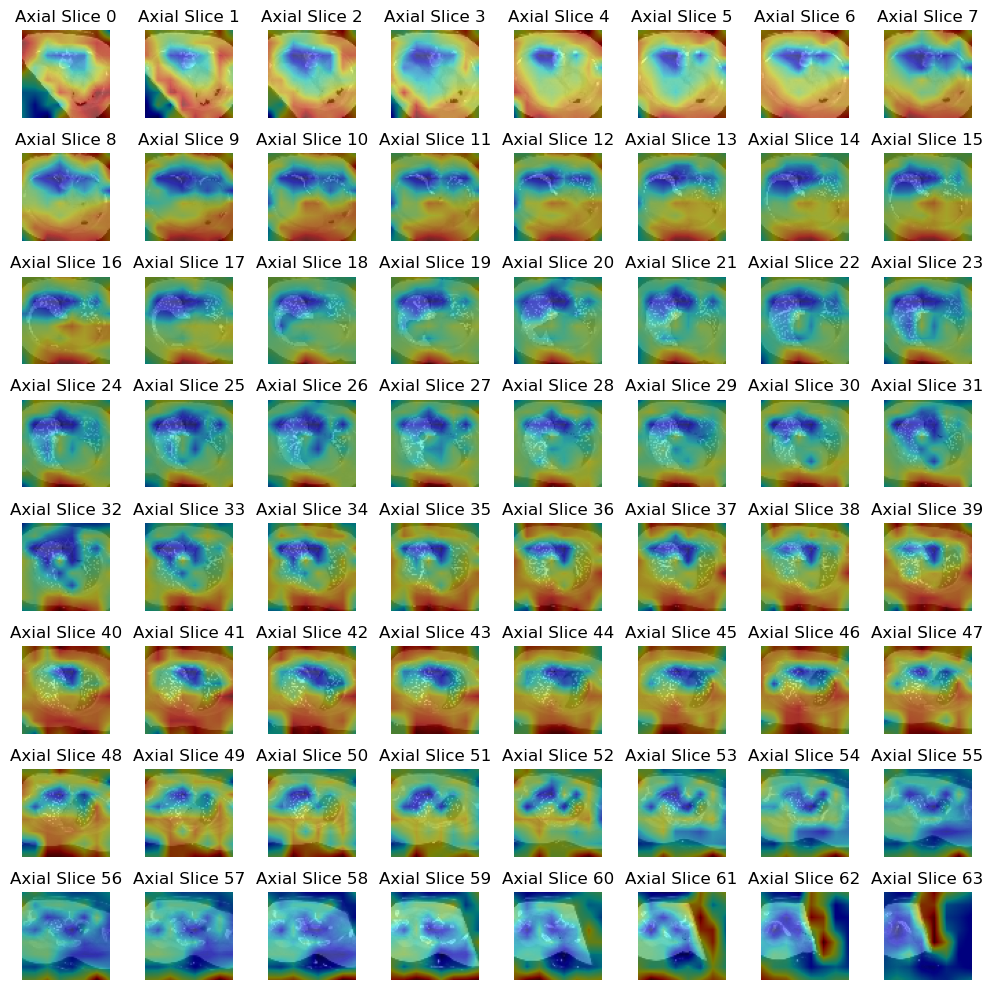

Loading heatmap for token 'consolidation' from: /jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/no_consolidation_sample_0.npy_token_2_consolidation_heatmaps.npy
Loaded heatmaps with shape: (64, 8, 8)
Resized heatmap volume shape: (64, 64, 64)


<Figure size 1500x1500 with 0 Axes>

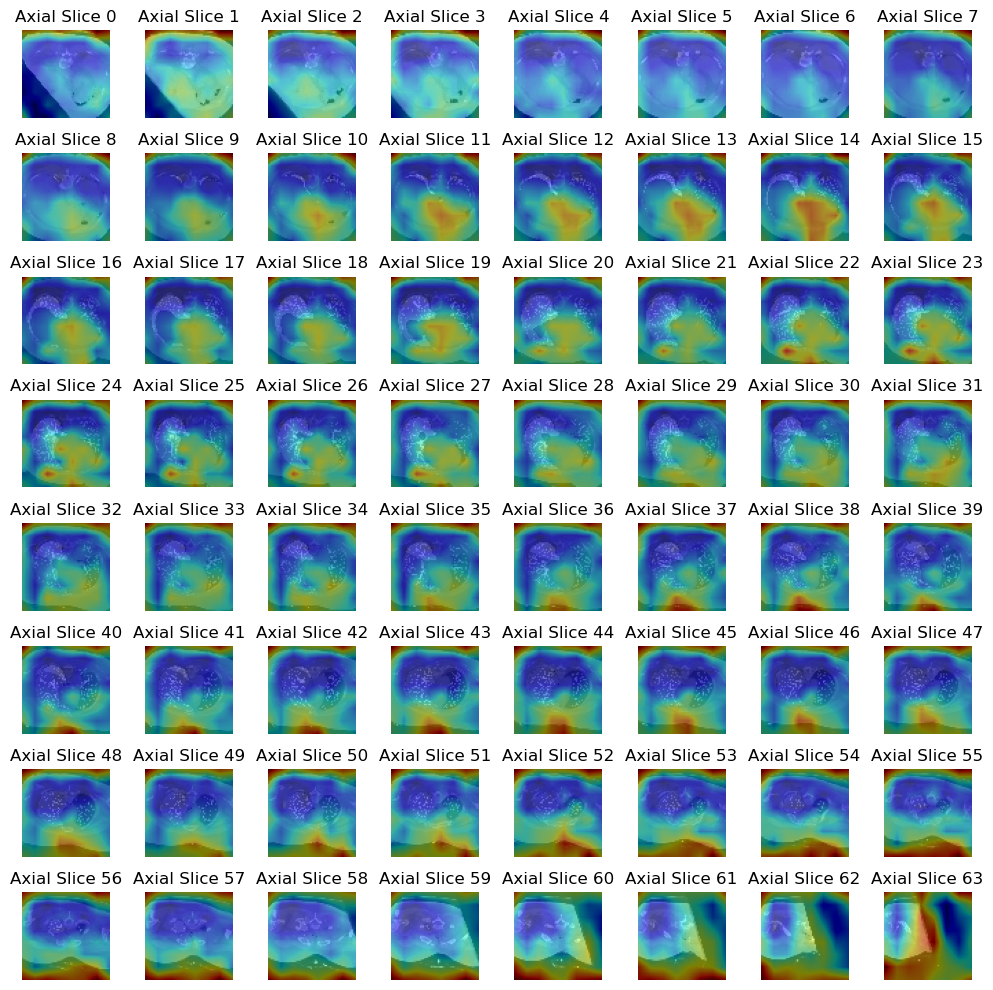

In [19]:
#token wise heatmaps
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from scipy.ndimage import zoom

def normalize_image(image):
    image_min = image.min()
    image_max = image.max()
    return (image - image_min) / (image_max - image_min + 1e-8)

def overlay_heatmap_on_slices(volume, heatmap_volume, view='axial', n_rows=8, n_cols=8):
    # Determine the slices based on the view
    if view == 'axial':
        slices = volume
        heatmap_slices = heatmap_volume
    elif view == 'coronal':
        slices = np.transpose(volume, (1, 0, 2))
        heatmap_slices = np.transpose(heatmap_volume, (1, 0, 2))
    elif view == 'sagittal':
        slices = np.transpose(volume, (2, 0, 1))
        heatmap_slices = np.transpose(heatmap_volume, (2, 0, 1))
    else:
        raise ValueError("Invalid view. Choose from 'axial', 'coronal', or 'sagittal'.")

    num_slices = slices.shape[0]
    total_plots = n_rows * n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))
    axes = axes.flatten()

    for idx in range(total_plots):
        slice_idx = idx 

        if slice_idx >= num_slices:
            axes[idx].axis('off')
            continue

        image_slice = slices[slice_idx, :, :]
        image_slice_norm = normalize_image(image_slice)

        heatmap_slice = heatmap_slices[slice_idx, :, :]
        heatmap_slice_norm = normalize_image(heatmap_slice)

        axes[idx].imshow(image_slice_norm, cmap='gray')
        axes[idx].imshow(heatmap_slice_norm, cmap='jet', alpha=0.5)

        axes[idx].set_title(f'{view.capitalize()} Slice {slice_idx}')
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()
image_data_path = '/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/no_consolidation_sample_0.npy'
heatmaps_folder = '/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/'

tokens = ['no', 'consolidation']  # Adjust this list based on your tokens
data = np.load(image_data_path)
print(f"Loaded generated images with shape: {data.shape}")
sample = data[0].mean(axis=0)  # Shape: (frames, height, width)
num_frames, height, width = sample.shape
print(f"Sample shape: {sample.shape}")
sample_norm = normalize_image(sample)
base_filename = os.path.basename(image_data_path)
print(f"Base filename: {base_filename}")

for token in tokens:
    heatmap_data_pattern = f'{base_filename}_token_*_{token}_heatmaps.npy'
    heatmap_data_path = os.path.join(heatmaps_folder, heatmap_data_pattern)
    # Use glob to find the exact file (in case token index varies)
    heatmap_files = glob.glob(heatmap_data_path)
    if not heatmap_files:
        print(f"No heatmap file found for token '{token}'.")
        continue
    heatmap_data_path = heatmap_files[0]  # Take the first matching file
    print(f"Loading heatmap for token '{token}' from: {heatmap_data_path}")
    heatmaps = np.load(heatmap_data_path)
    print(f"Loaded heatmaps with shape: {heatmaps.shape}")
    if heatmaps.shape[0] != num_frames:
        print(f"Number of frames in heatmaps ({heatmaps.shape[0]}) does not match the images ({num_frames}).")
        continue
    resized_heatmaps = []
    for i in range(num_frames):
        heatmap_slice = heatmaps[i, :, :]  # Shape: (8, 8)
        heatmap_slice_norm = normalize_image(heatmap_slice)
        zoom_factors = (height / heatmap_slice.shape[0], width / heatmap_slice.shape[1])
        heatmap_resized = zoom(heatmap_slice_norm, zoom_factors, order=1)  # Bilinear interpolation
        resized_heatmaps.append(heatmap_resized)
    heatmap_volume = np.stack(resized_heatmaps, axis=0)  # Shape: (num_frames, height, width)
    print(f"Resized heatmap volume shape: {heatmap_volume.shape}")
    view = 'axial'  # Or 'coronal', 'sagittal'
    plt.figure(figsize=(15, 15))
    plt.suptitle(f"Overlay of Heatmaps for Token '{token}' - View: {view.capitalize()}", fontsize=16)
    overlay_heatmap_on_slices(sample_norm, heatmap_volume, view=view, n_rows=8, n_cols=8)



heatmaps.shape: (51, 512, 64, 32)
heatmap_t.shape before reshaping: (512, 64, 32)
heatmap_t.shape after reshaping: (1, 64, 8, 64, 32)


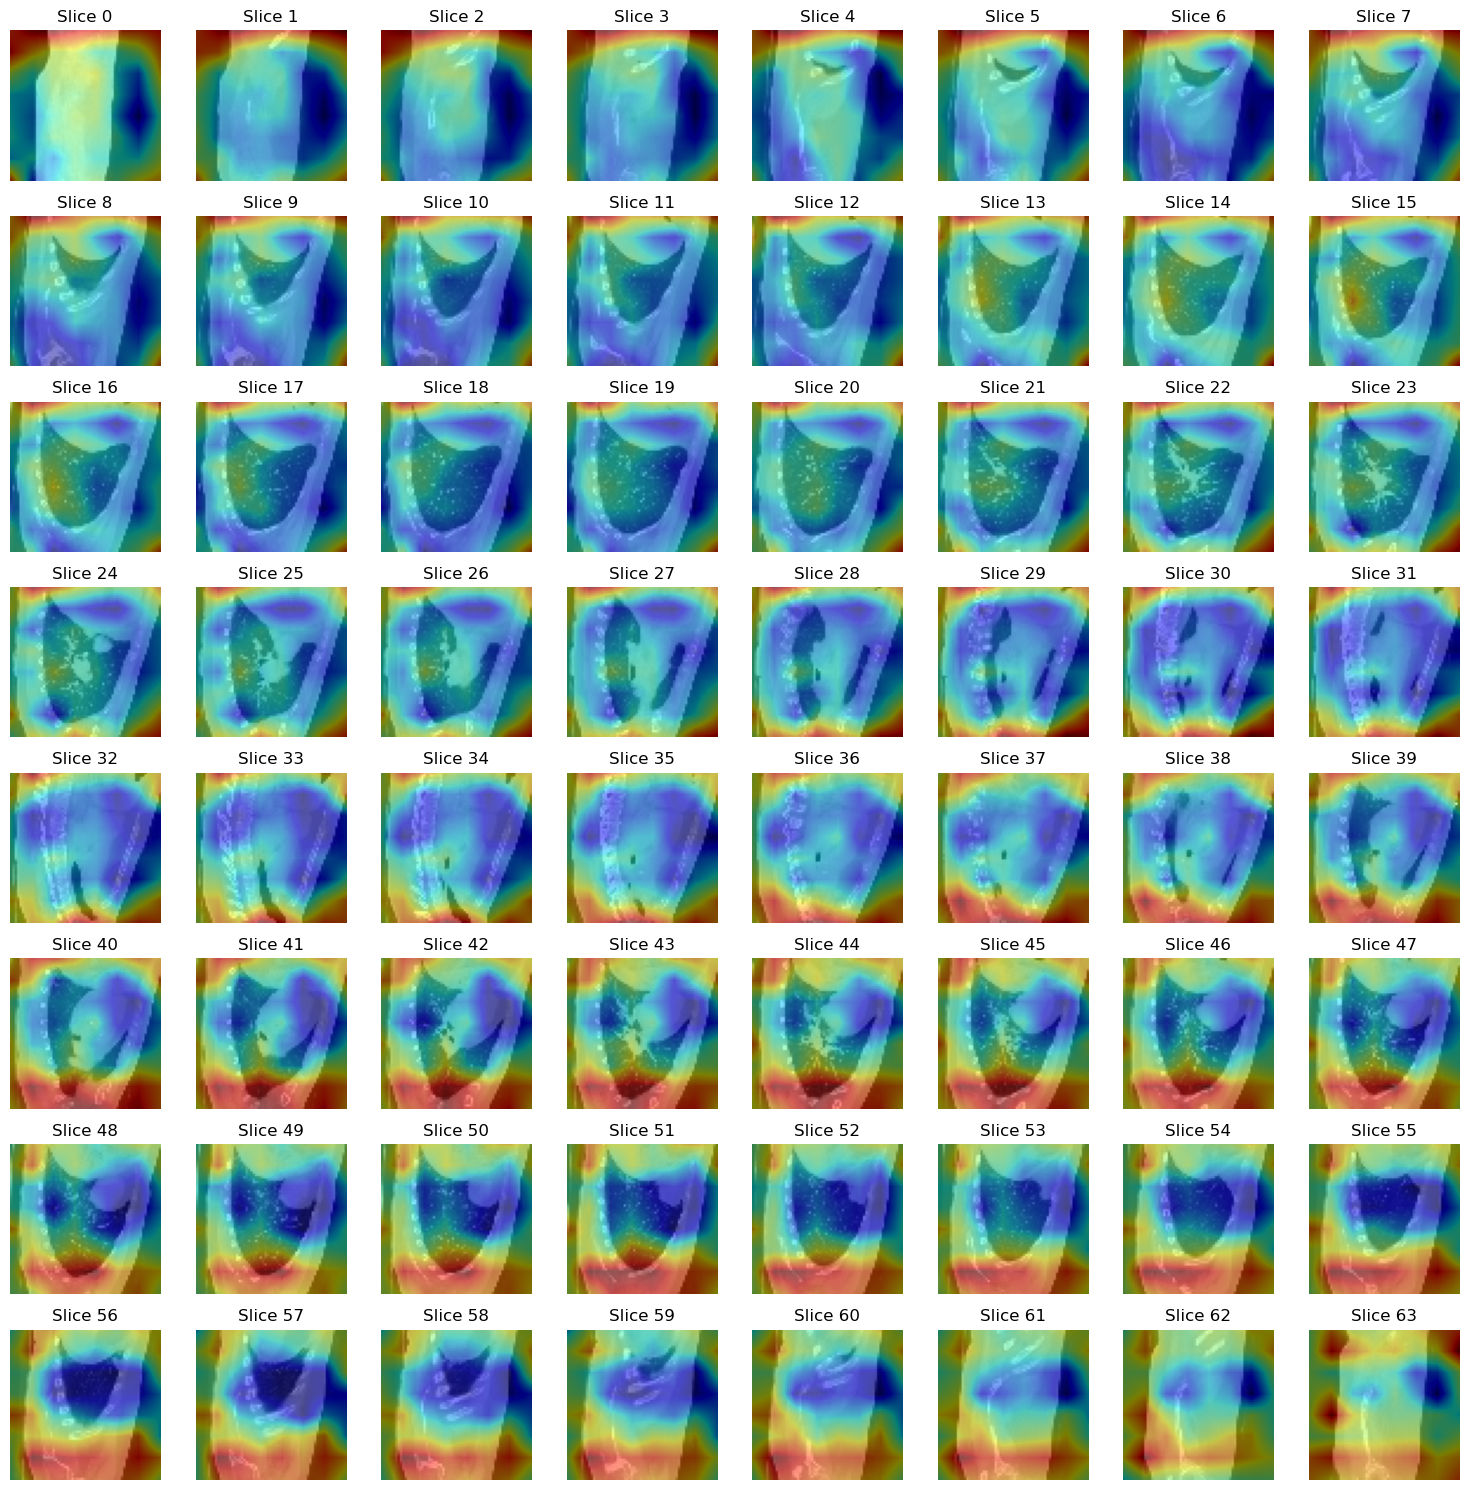

In [1]:
#regular mapss
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

image_data_path = '/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/left_pneu_sample_0.npy'
data = np.load(image_data_path)
heatmap_data_path = '/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/left_pneu_sample_0.npy_heatmaps.npy'
heatmaps = np.load(heatmap_data_path)

sample = data[0, 0, :, :, :]  

n_rows = 8
n_cols = 8
num_frames = sample.shape[2]  # Should be 64
time_steps = heatmaps.shape[0]  # Should be 51
heads = 8  
spatial_size = 8 
t = time_steps - 1  
heatmap_t = heatmaps[t]

# Verify the shape
print("heatmaps.shape:", heatmaps.shape)
print("heatmap_t.shape before reshaping:", heatmap_t.shape)

batch_size = 1  # Adjust if your batch size is different
frames = num_frames
query_length = heatmap_t.shape[1]
key_length = heatmap_t.shape[2]
heatmap_t = heatmap_t.reshape(batch_size, frames, heads, query_length, key_length)

print("heatmap_t.shape after reshaping:", heatmap_t.shape)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))


axes = axes.flatten()
for i in range(n_rows * n_cols):
    if i >= frames:
        axes[i].axis('off')  # Hide unused subplots
        continue
    image_slice = sample[:, :, i]  # Shape: (64, 64)

    heatmaps_frame = heatmap_t[0, i]  # Shape: (8, 64, 32)
    heatmap_avg = np.mean(heatmaps_frame, axis=(0, 2))  # Shape: (64,)

    heatmap_2d = heatmap_avg.reshape(spatial_size, spatial_size)
    zoom_factor = (image_slice.shape[0] / spatial_size, image_slice.shape[1] / spatial_size)
    heatmap_resized = zoom(heatmap_2d, zoom_factor, order=1)  # Bilinear interpolation
    heatmap_resized -= heatmap_resized.min()
    if heatmap_resized.max() != 0:
        heatmap_resized /= heatmap_resized.max()
    image_slice_norm = image_slice - image_slice.min()
    if image_slice_norm.max() != 0:
        image_slice_norm /= image_slice_norm.max()
    axes[i].imshow(image_slice_norm, cmap='gray')
    axes[i].imshow(heatmap_resized, cmap='jet_r', alpha=0.5)
    axes[i].set_title(f'Slice {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


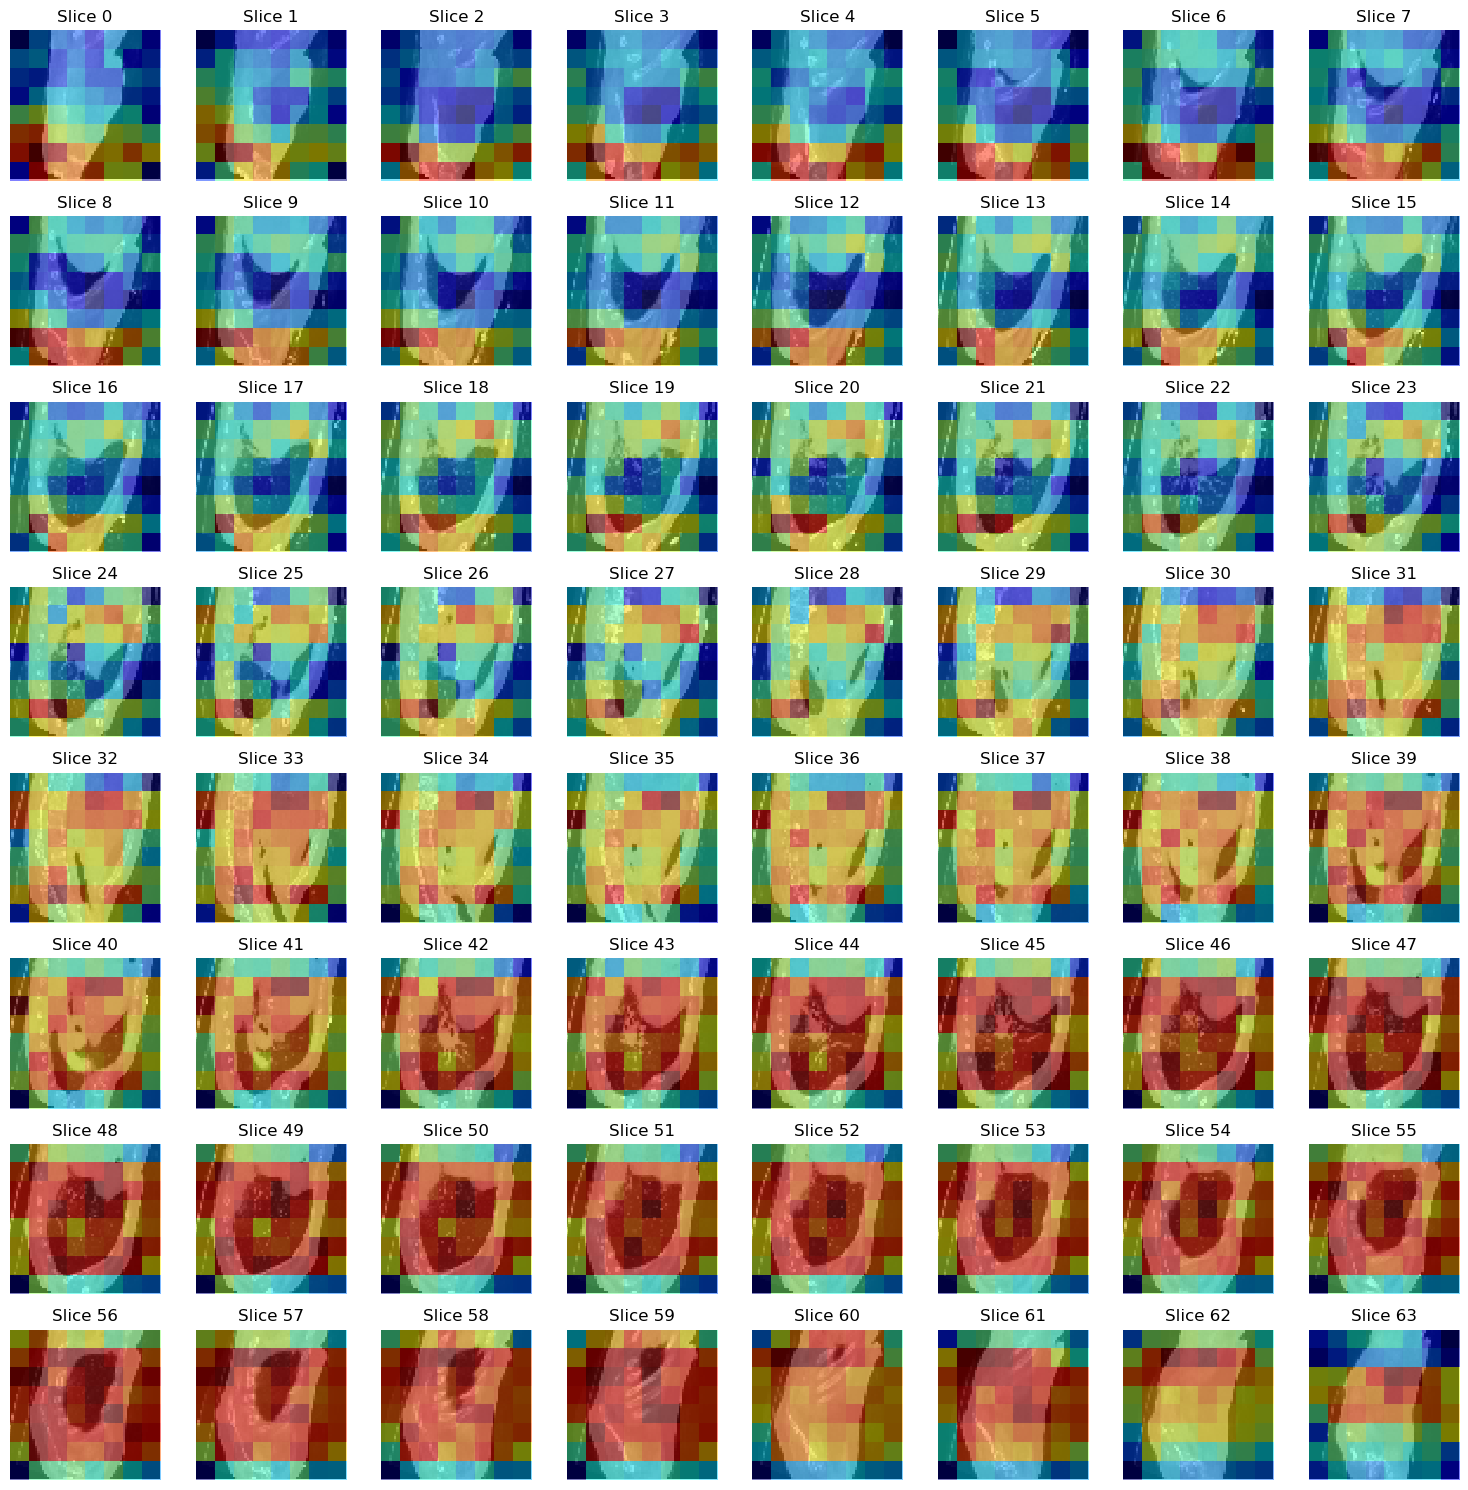

In [3]:
#non bilinearly interpolated maps

import numpy as np
import matplotlib.pyplot as plt
image_data_path = '/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/left_pneu_sample_0.npy'
data = np.load(image_data_path)
heatmap_data_path = '/jet/home/abradsha/MEDSYN/results/img_64_standard_bulk/left_pneu_sample_0.npy_heatmaps.npy'
heatmaps = np.load(heatmap_data_path)
sample = data[0, 0, :, :, :]  # Shape: (64, 64, 64)

n_rows = 8
n_cols = 8
num_frames = sample.shape[2]  # Should be 64
time_steps = heatmaps.shape[0]  # Should be 51
heads = 8  
spatial_size = 8  

t = time_steps - 1  # Index of the last time step (0-based)


heatmap_t = heatmaps[t]  


batch_size = 1 
frames = num_frames
query_length = heatmap_t.shape[1]
key_length = heatmap_t.shape[2]
heatmap_t = heatmap_t.reshape(batch_size, frames, heads, query_length, key_length)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten()

for i in range(n_rows * n_cols):
    if i >= frames:
        axes[i].axis('off')  
        continue

    image_slice = sample[:, :, i] 
    heatmaps_frame = heatmap_t[0, i] 
    heatmap_avg = np.mean(heatmaps_frame, axis=(0, 2))  # Shape: (64,)
    heatmap_2d = heatmap_avg.reshape(spatial_size, spatial_size)
    heatmap_2d -= heatmap_2d.min()
    if heatmap_2d.max() != 0:
        heatmap_2d /= heatmap_2d.max()
    image_slice_norm = image_slice - image_slice.min()
    if image_slice_norm.max() != 0:
        image_slice_norm /= image_slice_norm.max()
    axes[i].imshow(image_slice_norm, cmap='gray', interpolation='nearest')
    axes[i].axis('off')
    axes[i].imshow(heatmap_2d, cmap='jet', alpha=0.5, interpolation='nearest',
                   extent=(0, image_slice.shape[1], image_slice.shape[0], 0))

    axes[i].set_title(f'Slice {i}')
plt.tight_layout()
plt.show()
